# Week 1

## Ex1
Suppose the globe tossing data (Lecture 2, Chapter 2) had turned out to
be 4 water and 11 land. Construct the posterior distribution.

In [1]:
sample_data = ["W"] * 4 + ["L"] * 11

['W', 'W', 'W', 'W', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L']

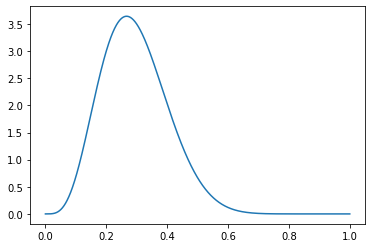

In [5]:
from math import factorial
import numpy as np
from matplotlib import pyplot as plt

def posterior(p):
    L = sum([1 for x in sample_data if x == 'L'])
    W = sum([1 for x in sample_data if x == 'W'])
    prob = factorial(W + L + 1) / (factorial(L) * factorial(W)) * p ** W * (1 - p) ** L
    return prob


grid = np.linspace(0,1,1000)
posterior_prob = [posterior(x) for x in grid]

plt.plot(grid, posterior_prob)


## Ex2

Using the posterior distribution from 1, compute the posterior predictive distribution for the next 5 tosses of the same globe. I recommend you use the sampling method.

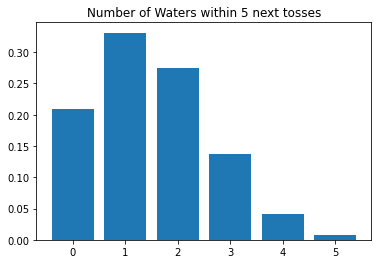

In [48]:
from collections import Counter

def draw_from_posterior(n):
    return np.random.default_rng().beta(a=4 + 1, b=11 + 1, size=n)

def predictive_post(p, size):
    return np.random.default_rng().choice(['W','L'], replace=True, p=[p, 1-p], size=size)


draws = draw_from_posterior(10_000)
samples = [predictive_post(p, size=5) for p in draws]

count_W = [np.sum(s == 'W') for s in samples]

x,y = zip(*Counter(count_W).items())

p_y = [yi / sum(y) for yi in y]

plt.bar(x, p_y)
plt.title("Number of Waters within 5 next tosses")
plt.show()

## Ex3

Use the posterior predictive distribution from 2 to calculate the probability of 3 or more water samples in the next 5 tosses.


In [53]:
rel_counts = sum([yi for (xi, yi) in zip(x,y) if xi >= 3])
print("Probability is {:.3f}".format(rel_counts / sum(y)))


Probability is 0.186


## Ex4

This problem is an optional challenge for people who are taking the course for a second or third time. Suppose you observe W = 5 water points, but you forgot to write down how many times the globe was
tossed, so you don’t know the number of land points L. Assume that p = 0:7 and compute the posterior distribution of the number of tosses N. Hint: Use the binomial distribution


<BarContainer object of 15 artists>

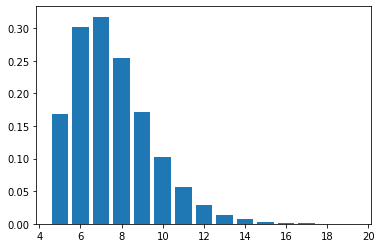

In [54]:
from scipy.stats import binom

W = 5
p = 0.7

possible_N = range(5,20)
n_prob = [binom.pmf(k=W, n=n, p=p) for n in possible_N]
plt.bar(possible_N, n_prob)